<a href="https://colab.research.google.com/github/jyoon0319/2023S/blob/main/CommonExpressions_ngrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extract Common Expressions (using n-grams)

Analyzing common expressions in a specific genre of writing using n-grams in Python involves several steps:
1)data collection,
2)data preprocessing,
3)n-gram generation,
4)analysis, and
5)visualization.

### Step 1: Data Collection

option A. For data collection, you can gather text data from various sources, such as text files, websites, or databases, and store it in a variable or file. Here's an example of loading text from a file:

In [2]:
from google.colab import files

# 파일 업로드
uploaded = files.upload()

# 텍스트 데이터를 저장할 변수
text_data = ""

# 업로드된 파일 하나를 읽어 text_data에 저장
for filename in uploaded.keys():
    with open(filename, 'r', encoding='utf-8') as f:
        text_data = f.read()

Saving sample_cvs.txt to sample_cvs.txt


option B. If you'd like to read multiple files in Python, you can modify the code to upload multiple files and concatenate their contents into a single text_data variable.

In [ ]:
from google.colab import files

# 여러 파일 업로드
uploaded = files.upload()

# 모든 텍스트를 이어붙일 변수
text_data = ""

# 업로드된 모든 파일의 내용을 하나로 연결
for filename in uploaded.keys():
    with open(filename, 'r', encoding='utf-8') as f:
        text_data += f.read() + "\n"  # 파일 간 줄 구분을 위해 개행 추가


### Step 2: Data Preprocessing

For data preprocessing, you can clean, tokenize, remove stopwords, and perform stemming/lemmatization.

- Tokenize the text to break it into words or tokens.
- Remove stopwords (common words like "the," "and," "in") and punctuation marks.
- (skip this) Apply stemming or lemmatization to reduce words to their base form for better pattern recognition.

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Clean and preprocess text
text_data = text_data.lower()  # Convert to lowercase
tokens = word_tokenize(text_data)  # Tokenization
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords

# Remove numbers, and additional punctuation
# Define a list of additional punctuation marks to remove
# Import the string module for additional punctuation removal
#import string
#additional_punctuation = list(string.punctuation) + ["•", "busan", ",", ":", "dong-a"]
#filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha() and word not in additional_punctuation]


# Apply stemming
#stemmer = PorterStemmer()
#stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###Step 3: Frequency Analysis & Visualization:

-Use Python's collections.Counter to count the frequency of words or phrases in the resumes.
-Identify the most frequent terms, which are likely common expressions.

-To visualize the most common expressions from your word frequency analysis, you can create a bar chart using the Matplotlib library.

In [8]:
from collections import Counter

# Count word frequencies
word_counts = Counter(filtered_tokens)

# Get the most common expressions
common_expressions = word_counts.most_common(10)  # Adjust the number as needed
print(common_expressions)

[('media', 8), ('korea', 5), ('experience', 5), ('video', 5), ('sales', 5), ('business', 4), ('skills', 4), ('university', 4), ('february', 4), ('hadan', 3)]


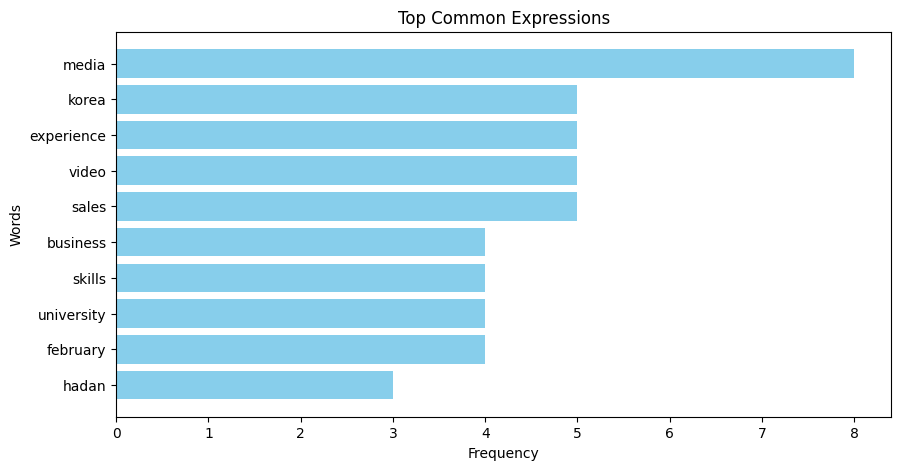

In [10]:
import matplotlib.pyplot as plt

# Extract words and their frequencies from common_expressions
words, frequencies = zip(*common_expressions[:10]) #Top 10

# Create a bar chart
plt.figure(figsize=(10, 5))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top Common Expressions')
plt.gca().invert_yaxis()  # Invert the y-axis for readability
plt.show()

### Step 4: N-gram Generation

For n-gram generation, you can use a simple loop to create n-grams of the desired length:

In [14]:
def generate_ngrams(tokens, n):
    ngrams = []
    for i in range(len(tokens) - n + 1):
        ngram = ' '.join(tokens[i:i + n])
        ngrams.append(ngram)
    return ngrams

n = 2  # Change n to desired value (e.g., 2 for bigrams, 3 for trigrams)
ngrams = generate_ngrams(filtered_tokens, n)

### Step 5: Analysis

To analyze n-grams, you can count their frequencies using Python's collections.Counter.

- Identify the most frequent terms, which are likely common expressions.

In [15]:
from collections import Counter

# Count n-gram frequencies
ngram_counts = Counter(ngrams)

# List the most common n-grams
most_common_ngrams = ngram_counts.most_common(10)  # Adjust the number as needed
for ngram, count in most_common_ngrams:
    print(f'{ngram}: {count} times')

hadan korea: 3 times
education university: 3 times
objective obtain: 2 times
international business: 2 times
computer skills: 2 times
upon request: 2 times
request hadan: 2 times
video digital: 2 times
digital cinema: 2 times
video production: 2 times


### Step 6: Visualization

For visualization, you can create a word cloud and bar chart using libraries like WordCloud and Matplotlib:

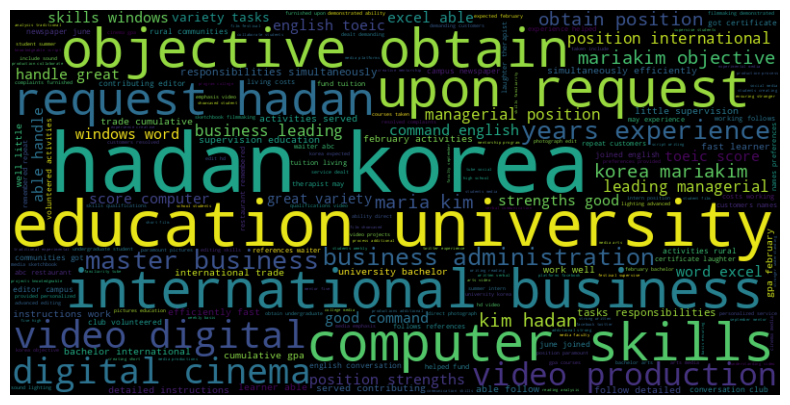

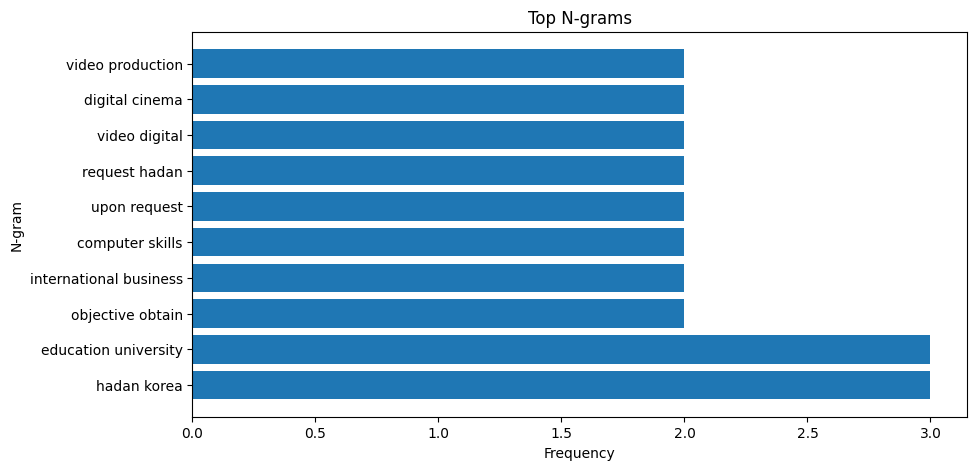

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(ngram_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Plot a bar chart
ngram_labels, ngram_values = zip(*most_common_ngrams)
plt.figure(figsize=(10, 5))
plt.barh(ngram_labels, ngram_values)
plt.xlabel('Frequency')
plt.ylabel('N-gram')
plt.title('Top N-grams')
plt.show()

******************************************

# What does it mean by n-gramgs?

An n-gram is a contiguous sequence of n items (which can be characters, words, or tokens) from a given sample of text or speech. The "n" in n-gram represents the number of items in the sequence. N-grams are commonly used in natural language processing (NLP) and text analysis to capture patterns and relationships between items in a sequence. Here's what n-grams mean when n is two or three, along with examples:

1. Bigram (n=2):
-A bigram is a sequence of two consecutive items, often words or tokens, in a text. Bigrams capture the relationships between adjacent items in the sequence.
-Example: In the sentence "I love pizza," the bigrams would be "I love" and "love pizza."

2. Trigram (n=3):
-A trigram is a sequence of three consecutive items, typically words or tokens, in a text. Trigrams capture the relationships between three consecutive items.
-Example: In the sentence "I enjoy playing soccer," the trigrams would be "I enjoy playing" and "enjoy playing soccer."

Here's a practical example to illustrate the concept of n-grams:

Text: "Machine learning is a fascinating field."

-Bigrams (n=2):
"Machine learning"
"learning is"
"is a"
"a fascinating"
"fascinating field"

-Trigrams (n=3):
"Machine learning is"
"learning is a"
"is a fascinating"
"a fascinating field"
N-grams are flexible and can be used in various ways depending on the specific task or analysis you want to perform with text data. They help capture local patterns and relationships within a sequence of items, making them a valuable tool in text processing and analysis.

=================================================
N-grams are used in various NLP tasks for different purposes:

*Language Modeling: N-grams are used to build language models that estimate the probability of a word or sequence of words given the previous n-1 words. This is commonly used in tasks like text generation and speech recognition.

*Text Analysis: N-grams help analyze text for patterns, such as identifying common phrases or expressions, detecting plagiarism, or finding trends in language usage.

*Information Retrieval: In search engines, N-grams can be used for indexing and searching text, helping to find relevant documents based on query terms and their sequences.

*Sentiment Analysis: N-grams can be used to identify sentiment-bearing phrases in text, such as identifying positive or negative bigrams or trigrams in product reviews.